# Principal Component Analysis with Cancer Data

In [0]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [369]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cancerDF=pd.read_csv('/content/drive/My Drive/Colab Notebooks/R5Class/R5L1/breast-cancer-wisconsin-data.csv')

In [371]:
cancerDF.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [373]:
cancerDF.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [0]:
#Comments: Only Base Nuclei is an object data type which needs to be updated to a numeric type

In [375]:
cancerDF['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

Comments: There are two classes in the data set and class 2 is having 458 records and class 4 is 241 records. We can data we have enough data available for both the classes. However, it is slightly baised towards Class 2

In [376]:
cancerDF.shape

(699, 11)

Comments: The data set is having 699 records available with 11 attributes

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [377]:
cancerDF.isna().any()

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [378]:
temp = pd.DataFrame(cancerDF['Bare Nuclei'].str.isdigit()) 
print(temp[temp['Bare Nuclei'] == False])
print('\n No of rows having ? in the dataset:', temp[temp['Bare Nuclei'] == False].count())

     Bare Nuclei
23         False
40         False
139        False
145        False
158        False
164        False
235        False
249        False
275        False
292        False
294        False
297        False
315        False
321        False
411        False
617        False

 No of rows having ? in the dataset: Bare Nuclei    16
dtype: int64


In [379]:
# We could see "?" values in column 'Bare Nuclei', this should be removed from data set
cancerDF = cancerDF.replace('?', np.nan)
cancerDF = cancerDF.apply(lambda x: x.fillna(x.median()),axis=0)
# Comments: Replacing the values of ? with NAN then replace NAN with the median, to make the complete data set numeric
# Check for missing value in any other column
cancerDF.isna().any()

# None of the columns is having missing values

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [380]:
temp = pd.DataFrame(cancerDF['Bare Nuclei'].str.isdigit()) 
temp[temp['Bare Nuclei'] == False] 

,Bare Nuclei


Comments: Now all the non numeric values have been updated with median values

In [0]:
# No missing values found. So let us try to remove ? from bare nuclei column
cancerDF['Bare Nuclei']=pd.to_numeric(cancerDF['Bare Nuclei'])
# Get count of rows having ?


In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
cancerDF['Bare Nuclei'] = cancerDF['Bare Nuclei'].astype('int64')

In [383]:
cancerDF.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [0]:
# Comment: All the converted to integer now

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [385]:
# Check for correlation of variable
cancerDF.corr().transpose()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

# Class column is highly correlated to all the columns except Mitoses
# Bare Nuclei shows positive correlation with Cell Shape

In [0]:
# Comment: Dropping the ID Column is it is not significant
cancerDF.drop('ID', inplace=True, axis=1)

In [388]:
cancerDF.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


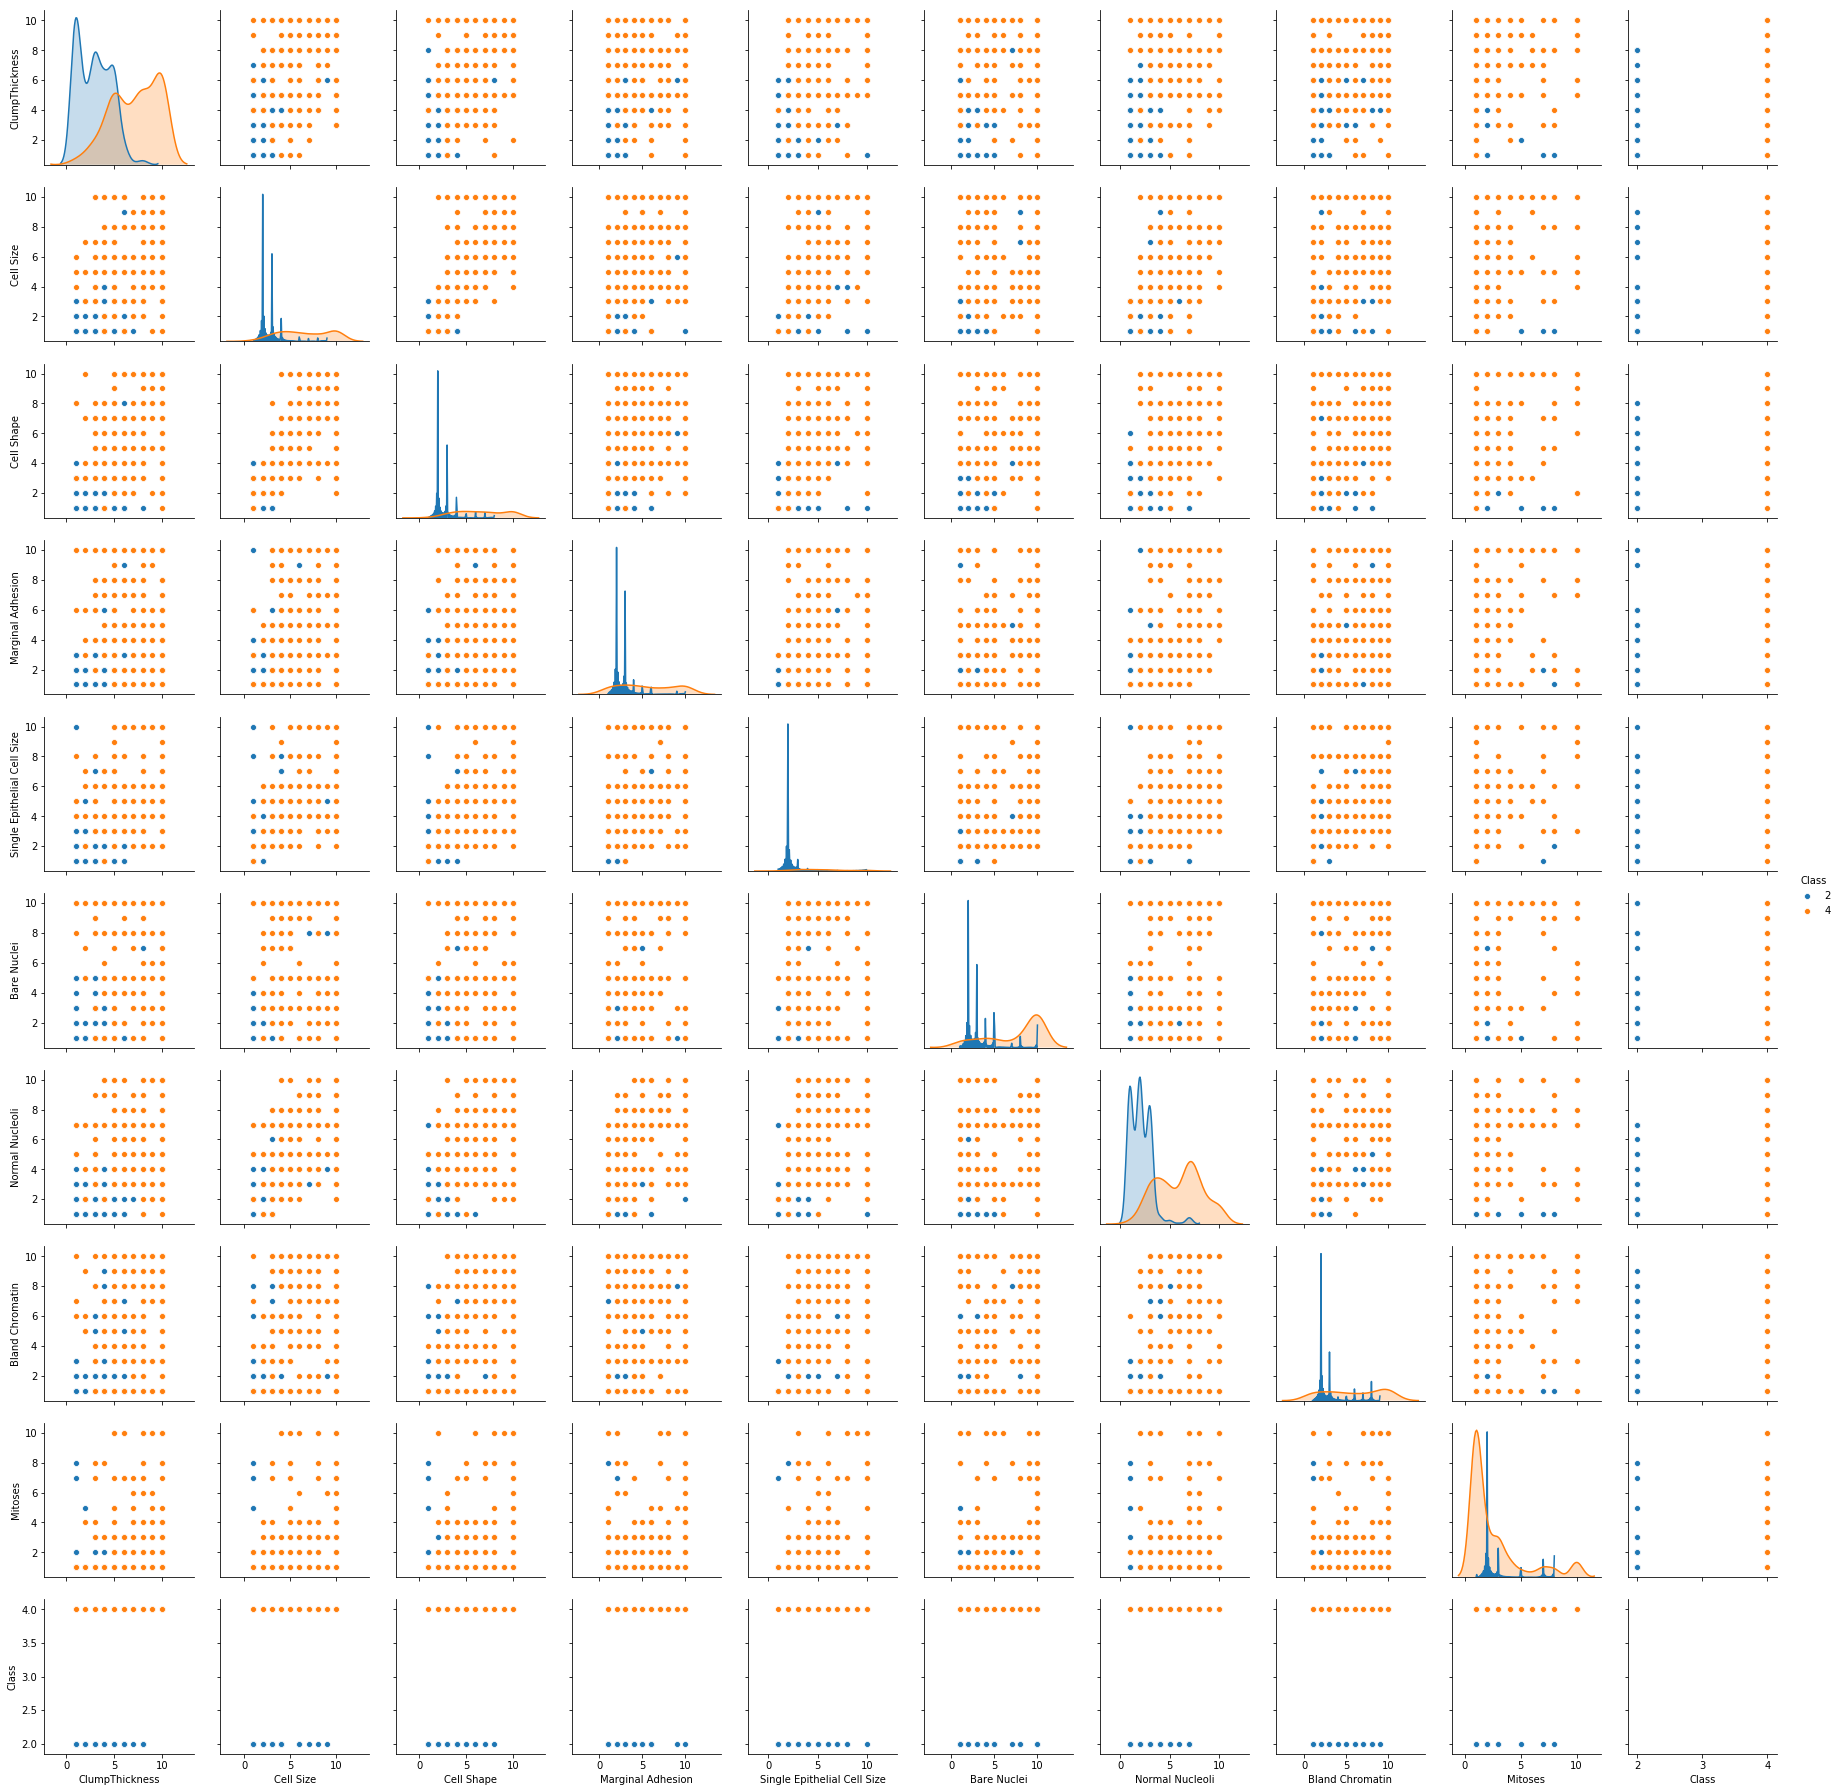

In [389]:
#Let us check for pair plots
sns.pairplot(cancerDF,hue='Class', diag_kind="kde")

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# 1. Class 2 has lower ClumpThickness density value , where as the density of class 4 increases as the value of ClumpThickness increases
# 2. class 2 data is having higher values of 'Cell Size', 'Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin'
#    where as class 4 has very less values for these attributes
# 3. Class 2 has lower 'Normal Nucleoli' as compared to class 4. The skewness on the right side shows asymmetric data

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

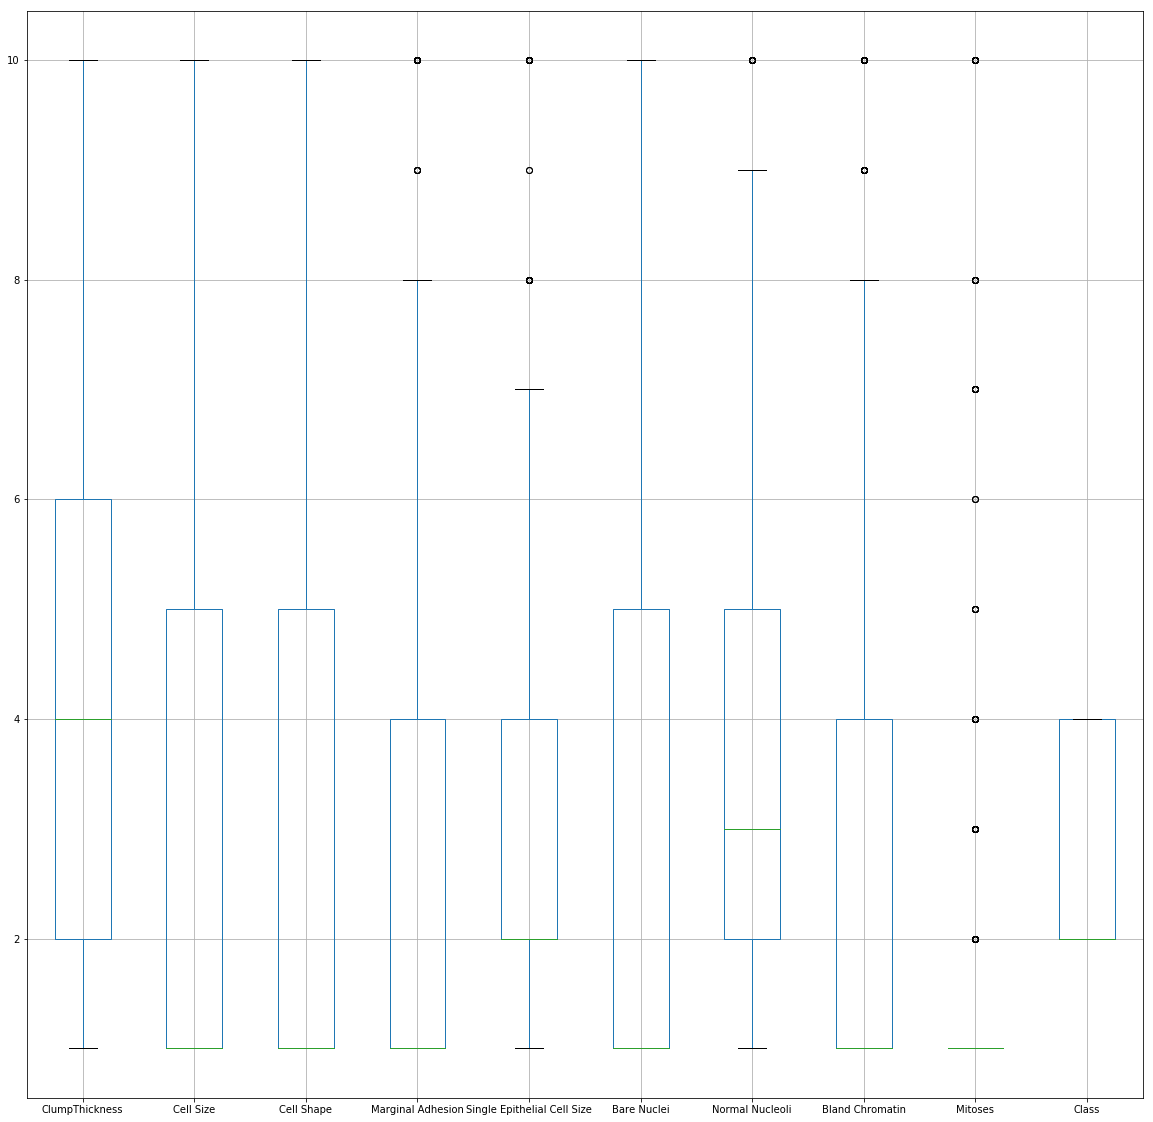

In [391]:
cancerDF.boxplot(column=['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],figsize=(20,20))

In [0]:
# We could see most of the outliers are now removed.

In [393]:
z = np.abs(stats.zscore(cancerDF))
print(z)

[[0.20693572 0.69999505 0.74329904 ... 0.61182504 0.34391178 0.72539705]
 [0.20693572 0.28384518 0.2668747  ... 0.28411186 0.34391178 0.72539705]
 [0.50386559 0.69999505 0.74329904 ... 0.61182504 0.34391178 0.72539705]
 ...
 [0.20693572 2.25152563 2.28722218 ... 2.33759359 0.23956962 1.37855538]
 [0.14846494 1.59563215 0.94032386 ... 1.02674087 0.34391178 1.37855538]
 [0.14846494 1.59563215 1.61377302 ... 0.37131451 0.34391178 1.37855538]]


In [0]:
cancerDF_z = cancerDF[(z < 3).all(axis=1)]

In [395]:
cancerDF.shape

(699, 10)

In [396]:
cancerDF_z.shape

(648, 10)

In [397]:
print(699-648,' rows have been removed after treating the outliers')

51  rows have been removed after treating the outliers


# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
X = cancerDF_z[cancerDF_z.columns[1:-1]]
y = cancerDF_z["Class"]
# Step 1 - Create covariance matrix
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [399]:
sc = StandardScaler()
X_train_std =  sc.fit_transform(X)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[1.0015456  0.90086598 0.69283943 0.73308212 0.67637148 0.74671627
  0.73094613 0.43155367]
 [0.90086598 1.0015456  0.67104351 0.70690496 0.68962935 0.73080354
  0.72309852 0.38961603]
 [0.69283943 0.67104351 1.0015456  0.59795509 0.68575821 0.6510195
  0.59378187 0.38750453]
 [0.73308212 0.70690496 0.59795509 1.0015456  0.59413265 0.62686014
  0.66848411 0.40724077]
 [0.67637148 0.68962935 0.68575821 0.59413265 1.0015456  0.65916743
  0.56133266 0.41411613]
 [0.74671627 0.73080354 0.6510195  0.62686014 0.65916743 1.0015456
  0.66758427 0.32865685]
 [0.73094613 0.72309852 0.59378187 0.66848411 0.56133266 0.66758427
  1.0015456  0.39706679]
 [0.43155367 0.38961603 0.38750453 0.40724077 0.41411613 0.32865685
  0.39706679 1.0015456 ]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [401]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.39751211  0.09927843  0.7315319   0.15591223  0.05254496 -0.22477271
  -0.46627867  0.04450647]
 [-0.39166555  0.15061393 -0.67108134  0.13169359  0.07603289 -0.30889211
  -0.49493771 -0.10030705]
 [-0.35211199  0.04269702 -0.04712266 -0.51150894 -0.14869859  0.69702573
  -0.27243928  0.16778817]
 [-0.35622047  0.01877496 -0.04831997  0.35769743 -0.77415335 -0.02582191
   0.29871666  0.23078209]
 [-0.35150436 -0.01168171  0.07388524 -0.58933111 -0.12272972 -0.37807569
   0.3365161  -0.50228591]
 [-0.36379798  0.2250308  -0.04702049 -0.07874852  0.49061292 -0.12962585
   0.43326936  0.60280484]
 [-0.35720521  0.06762119  0.0198977   0.46199125  0.30999911  0.45449729
   0.2700971  -0.52761757]
 [-0.23282289 -0.95390553 -0.04347046  0.04255496  0.13479713 -0.03520476
  -0.01575389  0.11180033]]

 Eigen Values 
%s [5.3508693  0.76914601 0.09662529 0.52122541 0.35554306 0.33316424
 0.30213215 0.2836593 ]


# Q8 Find variance and cumulative variance by each eigen vector

In [402]:
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(5.350869299927963, array([-0.39751211, -0.39166555, -0.35211199, -0.35622047, -0.35150436,
       -0.36379798, -0.35720521, -0.23282289])), (0.7691460074661589, array([ 0.09927843,  0.15061393,  0.04269702,  0.01877496, -0.01168171,
        0.2250308 ,  0.06762119, -0.95390553])), (0.5212254087614543, array([ 0.15591223,  0.13169359, -0.51150894,  0.35769743, -0.58933111,
       -0.07874852,  0.46199125,  0.04255496])), (0.3555430574662632, array([ 0.05254496,  0.07603289, -0.14869859, -0.77415335, -0.12272972,
        0.49061292,  0.30999911,  0.13479713])), (0.3331642449986237, array([-0.22477271, -0.30889211,  0.69702573, -0.02582191, -0.37807569,
       -0.12962585,  0.45449729, -0.03520476])), (0.3021321507189273, array([-0.46627867, -0.49493771, -0.27243928,  0.29871666,  0.3365161 ,
        0.43326936,  0.2700971 , -0.01575389])), (0.28365929655015226, array([ 0.04450647, -0.10030705,  0.16778817,  0.23078209, -0.50228591,
        0.60280484, -0.52761757,  0.11180033])), (0.09

In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)

In [404]:
print('Variance is as following \n', var_explained)

Variance is as following 
 [0.6678264731970281, 0.09599488171886672, 0.06505263107034358, 0.044374297488555633, 0.041581262830653866, 0.0377082371749896, 0.03540269384026787, 0.012059522679294611]


In [405]:
print('Cumulative Variance is as following \n', cum_var_exp)

Cumulative Variance is as following 
 [0.66782647 0.76382135 0.82887399 0.87324828 0.91482955 0.95253778
 0.98794048 1.        ]


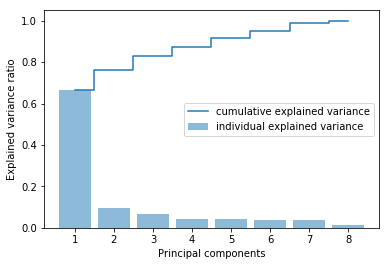

In [406]:
plt.bar(range(1,9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [0]:
import sklearn.decomposition as dec

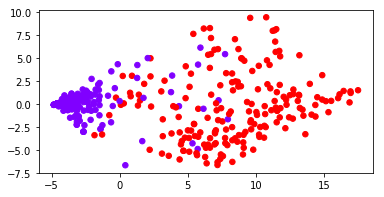

In [408]:
pc = dec.PCA()
X_bis = pc.fit_transform(X)
#dec.KernelPCA(kernel='rbf').fit_transform(X)
#
plt.figure(figsize=(6,3));
plt.scatter(X_bis[:,0], X_bis[:,1], c=y,
            s=30, cmap=plt.cm.rainbow);

In [409]:
pc.components_

array([[ 0.41836809,  0.40438868,  0.35426269,  0.20922617,  0.4905854 ,
         0.31381261,  0.38672934,  0.05872243],
       [ 0.24915629,  0.2108389 , -0.1714512 ,  0.11318236, -0.76238916,
         0.07342516,  0.51438215, -0.00669719],
       [ 0.12625992,  0.03691263,  0.79905176, -0.0158523 , -0.40799753,
         0.0484999 , -0.41827815, -0.01378517],
       [ 0.45287234,  0.48507369, -0.42877239,  0.02445002, -0.02576286,
         0.03644951, -0.61023626, -0.02803587],
       [ 0.14963773,  0.19709162,  0.12861628,  0.09459928,  0.0767365 ,
        -0.941918  ,  0.11800498,  0.0790512 ],
       [ 0.02187959, -0.30455425, -0.06066786,  0.93210365, -0.02517044,
         0.0132904 , -0.14890252,  0.10624517],
       [ 0.70702658, -0.64107547, -0.04646784, -0.24125805,  0.04218947,
        -0.03223608,  0.02709652,  0.15880053],
       [-0.1381941 ,  0.11305561, -0.01977235, -0.08119957, -0.05158518,
         0.06343718, -0.0409286 ,  0.97610248]])

In [410]:
pc.explained_variance_

array([36.71082497,  4.81759824,  2.53421866,  2.46778206,  1.71692416,
        1.04655654,  0.7314047 ,  0.42480469])

In [411]:
pc.explained_variance_ratio_

array([0.72766585, 0.09549232, 0.05023217, 0.04891529, 0.03403212,
       0.02074438, 0.01449758, 0.00842029])

In [412]:
pc.n_features_

8

In [0]:
#principalDf = pd.DataFrame(data = X_bis
#             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4', 'principal component 5'
#             , 'principal component 6', 'principal component 7', 'principal component 8'])

In [414]:
X_bis.shape

(648, 8)

In [415]:
X_bis

array([[-4.00540474e+00,  1.64405361e-01,  5.25560969e-02, ...,
         1.17916536e-01,  4.10759163e-02,  5.19404793e-02],
       [ 5.72804511e+00, -4.92262240e+00, -4.31236614e-01, ...,
         3.31230291e+00, -7.46430594e-01, -1.01375743e+00],
       [-3.51481934e+00, -5.97983803e-01, -3.55441435e-01, ...,
         9.27460948e-02,  8.32653871e-02,  3.55303985e-04],
       ...,
       [ 1.12435828e+01,  7.99246108e+00, -1.31183301e+00, ...,
         8.95260777e-01, -3.38722161e-01,  2.01912116e-01],
       [ 7.81922068e+00,  3.36024200e+00,  5.26357631e-01, ...,
        -1.22858862e+00,  1.44062158e+00, -4.05995058e-01],
       [ 8.90861362e+00,  1.93249749e+00,  1.81194114e+00, ...,
        -6.93626722e-01, -1.41258823e-01, -2.50583722e-01]])

In [0]:
# Since we have set the PCA importance percentage as 95%, so the PCA components to be used has been reduced to 5 columns now.

# Q10 Find correlation between components and features

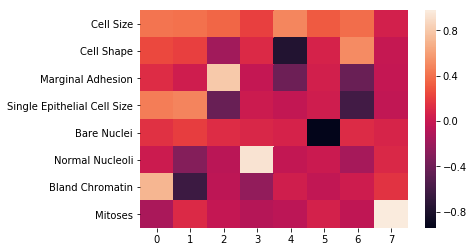

In [417]:
sns.heatmap(pd.DataFrame(pc.components_, list(X.columns)))

In [0]:
# PC1 is mostly impacted by Bland Chromatin
# PC2 is mostly impacted by Single Epithelial Cell Size
# PC3 is mostly impacted by Marginal Adhesion
# PC4 is mostly impacted by Normal Nucleoli
# PC5 is mostly impacted by Cell Size
# PC6 is mostly impacted by Cell Size, Marginal Adhesion,  Single Epithelial Cell Size
# PC7 is mostly impacted by Cell Shape
# PC8 is mostly impacted by Mitoses

# Content Based Recommendation System - Optional ( Q11 - Q18 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [419]:
moviesDF=pd.read_csv('/content/drive/My Drive/Colab Notebooks/R5Class/R5L1/movies_metadata.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16  Create cosine similarity matrix

# Q17  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q18 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q19 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [0]:
jokesDF=pd.read_csv('/content/drive/My Drive/Colab Notebooks/R5Class/R5L1/jokes.csv')

In [421]:
jokesDF.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,-6.80,-5.73,-5.00,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.60,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,...,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5.00,-4.42,-7.28,-6.50,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,4.27,7.62,-6.26,2.96,6.07,-3.50,-2.09,6.17,5.15,4.42,5.63,2.43,99.00,99.00,4.13,7.09,7.33,7.18,0.92,99.00,5.15,5.87,99.00,99.00,7.96,3.79,99.00,1.55,99.00,...,-1.50,5.78,99.00,99.00,8.93,8.50,99.00,2.43,7.48,99.00,99.00,5.97,6.36,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,3.83,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,8.20,-7.86,-6.94,-7.96,0.29,-9.90,-7.09,-7.18,1.02,-0.29,-4.71,-7.43,1.12,-8.25,3.79,0.10,3.45,-3.45,7.57,-4.17,-0.44,9.27,5.83,-3.40,-5.44,1.60,-7.14,3.01,-6.07,...,-3.20,-6.12,-2.91,-9.22,-2.62,-7.33,-3.25,-4.22,-9.81,-2

In [422]:
jokesDF.shape

(24983, 101)

# Q20 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [0]:
ratings=jokesDF.iloc[0:200,1:101]

In [424]:
ratings.shape

(200, 100)

# Q21 Change the column indices from 0 to 99

In [425]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,Joke40,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [0]:
ratings.columns=range(0,100)

In [427]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [0]:
ratings=ratings.replace(99.00,0)

# Q23 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [0]:
sc = StandardScaler()
ratings_diff =  sc.fit_transform(ratings) 

In [430]:
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q24  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [431]:
ratings_diff.mean(axis=0)

array([ 0.00000000e+00,  1.77635684e-17, -2.88657986e-17, -1.33226763e-17,
       -2.22044605e-18, -6.66133815e-18,  6.66133815e-18,  1.66533454e-17,
       -5.32907052e-17,  8.88178420e-18, -3.55271368e-17, -4.44089210e-17,
       -8.88178420e-18,  3.55271368e-17, -8.88178420e-18, -1.19904087e-16,
        1.99840144e-17,  2.55351296e-17,  8.88178420e-18,  2.66453526e-17,
        1.11022302e-16, -1.77635684e-17, -2.66453526e-17,  4.44089210e-17,
       -1.33226763e-17, -5.32907052e-17, -1.77635684e-17,  8.88178420e-18,
        0.00000000e+00,  0.00000000e+00,  3.55271368e-17, -1.06581410e-16,
        4.44089210e-18,  4.44089210e-18, -8.88178420e-18,  1.77635684e-17,
        1.77635684e-17, -2.22044605e-17, -1.77635684e-17,  1.11022302e-17,
        0.00000000e+00,  1.33226763e-17,  3.10862447e-17, -2.66453526e-17,
        8.88178420e-18, -1.33226763e-17, -1.77635684e-17,  7.77156117e-17,
       -1.77635684e-17,  7.10542736e-17, -8.88178420e-18, -8.88178420e-18,
       -4.44089210e-18,  

In [0]:
 ratingsDF=pd.DataFrame(ratings_diff.mean(axis=0))

In [433]:
ratingsDF.dtypes

0    float64
dtype: object

In [0]:
ratingsDF = ratingsDF.astype('float64')

In [0]:
#sortedDF=ratingsDF.sort_values(axis=1, by=0)
sortedDF=ratingsDF[0].sort_values(ascending=False)

In [436]:
sortedDF

53    1.154632e-16
20    1.110223e-16
47    7.771561e-17
49    7.105427e-17
64    7.105427e-17
99    5.773160e-17
83    4.440892e-17
23    4.440892e-17
73    4.440892e-17
13    3.552714e-17
30    3.552714e-17
42    3.108624e-17
19    2.664535e-17
17    2.553513e-17
84    2.442491e-17
88    2.220446e-17
16    1.998401e-17
62    1.998401e-17
71    1.776357e-17
76    1.776357e-17
36    1.776357e-17
35    1.776357e-17
1     1.776357e-17
68    1.665335e-17
7     1.665335e-17
55    1.332268e-17
57    1.332268e-17
41    1.332268e-17
39    1.110223e-17
18    8.881784e-18
          ...     
87   -1.387779e-17
67   -1.776357e-17
48   -1.776357e-17
21   -1.776357e-17
98   -1.776357e-17
46   -1.776357e-17
38   -1.776357e-17
26   -1.776357e-17
72   -2.220446e-17
89   -2.220446e-17
78   -2.220446e-17
77   -2.220446e-17
37   -2.220446e-17
96   -2.220446e-17
70   -2.664535e-17
43   -2.664535e-17
22   -2.664535e-17
61   -2.664535e-17
2    -2.886580e-17
86   -3.552714e-17
91   -3.552714e-17
10   -3.5527

In [437]:
ratingsDF.head(10)

,0
0,0.000000e+00
1,1.776357e-17
2,-2.886580e-17
3,-1.332268e-17
4,-2.220446e-18
5,-6.661338e-18
6,6.661338e-18
7,1.665335e-17
8,-5.329071e-17
9,8.881784e-18
